## 추천 시스템 리뷰

### 1. 내용 기반 필터링 (CBF)

- 콘텐츠의 유사도를 기반으로 사용자에게 컨텐츠를 추천
- 사용자가 기존에 이용했던 아이템과 유사한 아이템을 추천

### 2. 협업 필터링 (CF)

- 서비스 내에 있는 다수의 사용자들의 선호도 정보를 기반으로 추천
- 두 명의 사용자가 비슷한 관심사를 가짐 -> 한 사용자의 데이터를 바탕을 다른 사용자에게 추천

### 3. 하이브리드 필터링

- 2가지 이상의 다양한 알고리즘을 조합해서 만듦

### 협업 필터링의 구성 방식

1. 기억 기반 (memory-based) CF
    - 실제 평점 데이터를 메모리에 저장해두고 유사도를 계산
    1. 사용자 기반 협업 필터링
        - 나와 사용자 간의 유사도 계산 -> 상위 k명의 이웃 선정 -> 그들이 본 아이템을 추천
        - 계산량 높음, 사용자의 다양한 취향 반영하기 힘듦
    2. 아이템 기반 협업 필터링
        - 모든 아이템 쌍 간의 유사도를 계산 -> 내가 선택한 아이템과 유사한 아이템을 찾아 추천
        - 유사도 행렬이 비교적 안정적

2. 기억 기반 CF의 한계
    1. 데이터 희소성 문제
        - user-item행렬이 sparse
    2. 확장성 문제
        - 사용자, 아이템 수가 늘수록 계산량이 기하급수적으로 늘어남
    3. 새로운 아이템 문제 (cold start)
        - new item에 대한 선호도 계산이 불가능

3. 모델 기반 협업 필터링 등장
    - 위 한계를 극복하기 위해 관측된 평점 데이터로부터 유저와 아이템의 숨겨진 특성을 습
    - 이 잡재요인을 이용해 비어있는 평점을 예측

## 1. 인트로 - 모델 기반

### 1. 잠재 요인
- 수많은 평점 패턴을 수학적으로 설명할 수 있도록 모델이 스스로 학습하는 개념
- 행렬 분해를 통해 잠재 요인을 학습하고, 두 벡터를 내적해 예측한다.
    - 지금 보니 멀티 헤드 어탠션이랑 비슷한 것 같기도 하고
- 사후적이다.

### 1. 행렬 분해
- user-item 행렬이 사용자의 취향과 아이템의 특성의 내적으로 설명될 수 있다는 가설에서 출발
- 관측된 평점을 가장 잘 재현하는 적절한 잠재 요인의 개수 k 찾기, 그리고 잠재 요인 벡터를 내적하여 평점 예측하기

### 1. MF 수행 방식
1. svd: 선대에서 나오는 그거
2. sgd: 최적화 알고리즘
3. nmf: 제약 조건 기반 모델
4. pmf: 확률적 모델

## 최근 추천 시스템의 방향성

### 2.1 VAE 기반 협업 필터링

- 사용자의 아이템 상호작용 벡터(구매 이력 등)을 입력받아 잠재 공간에서 재구성하도록 VAE를 학습
- 구조
    - 인코더: 사용자 이력을 잠재변수 z 분포로 매핑
    - 디코더: z로부터 아이템 분포를 복원
- 장점
    - 확률적 잠재 분포를 통해 불확실성 반영
    - 희소한 상호작용 데이터에서도 강함

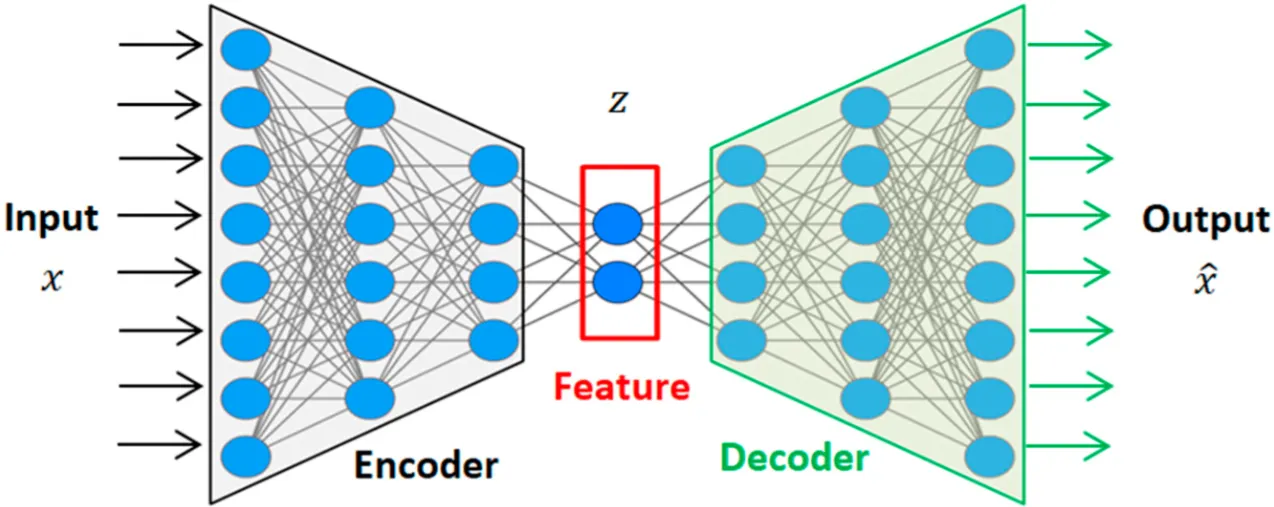

MF의 한계

| MF의 근본적 한계 | 내용 | 딥러닝의 해법 |
| --- | --- | --- |
| **선형성의 한계** | 평점 예측($\hat{r}_{u, i}$)이 단순한 잠재 벡터의 내적(Dot Product)으로만 이루어집니다. | 비선형 활성화 함수(ReLU 등)를 가진 신경망을 사용하여 복잡한 패턴을 학습합니다. |
| **불확실성 무시** | 사용자 취향을 단 하나의 벡터값(Point Estimate)으로만 표현합니다. | **확률 분포**로 취향을 모델링하여 데이터의 불확실성을 반영합니다. |

- 위 한계를 극복하기 위해 VAE가 등장

**왜 VAE인가?**

| 구분 | AutoEncoder (AE) | Variational AutoEncoder (VAE) |
| --- | --- | --- |
| **잠재 벡터 표현** | 단일 값 (Point Estimate) | **확률 분포** (평균 $\mu$, 분산 $\sigma$) |
| **데이터 불확실성** | 반영 불가 (단순 복원에 집중) | **데이터의 불확실성을 모델링**하여 안정성 확보 |
| **적용 시 장점** | 비선형성 학습 | 희소한 데이터에서 더 **강건**하며, 일반화 성능 우수 |

- VAE는 불확실성을 모델링함으로써 희소성에 대한 해답을 제시
- 더 robust함

**VAE 기반 CF의 작동 구조**

| 구성 요소 | 역할 |
| --- | --- |
| **입력** ($x$) | 사용자의 아이템 상호작용 벡터 |
| **인코더** | 사용자 이력을 잠재변수 $z$ 분포로 매핑 |
| **잠재 벡터** ($z$) | 샘플링된 최종 취향 벡터 |
| **디코더** | $z$로부터 아이템 분포를 복원 |

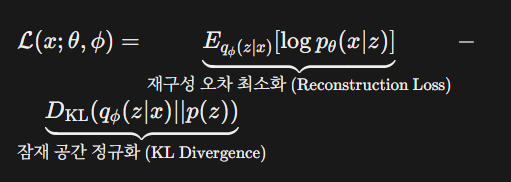

- 위의 목적함수 (두 가지의 목표)를 최적화함

1. 재구성 오차 최소화: z를 통해 원래의 입력 x를 최대한 비슷하게 복원
2. 잠재 공간 정규화: 인코더의 출력 잠재 분포가 사전 분포와 유사하도록 강제, 과적합 방지

- 주요 장점
    1. 확률적 잠재 분포 모델링을 통한 불확실성 반영
    2. 희소한 상호작용 데이터에서도 강건함
    3. 비선형적 학습

### 2.2 GNN 기반 사용자 선호 예측

- VAE같은 모델들도 "관계"나 "순서"를 활용하지는 못함

**GNN(Graphic Neural Network)**

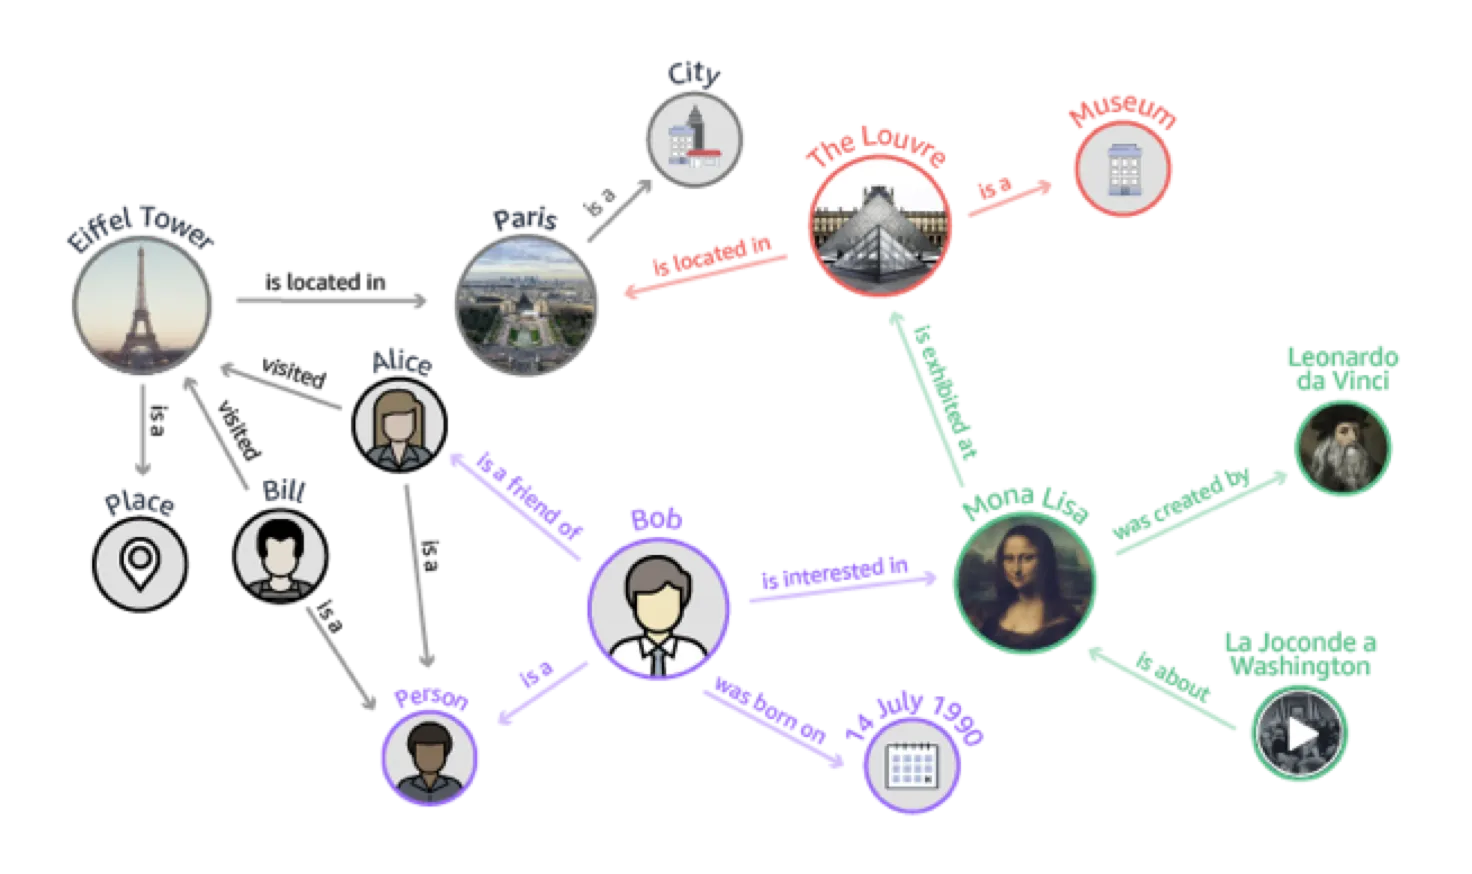

- 사용자&아이템의 거대한 관계망(그래프)을 형성
- 그래프란?
    - Node와 Edge를 모아 자료를 구성
    - 개체와 개체 간 상호작용을 나타냄
        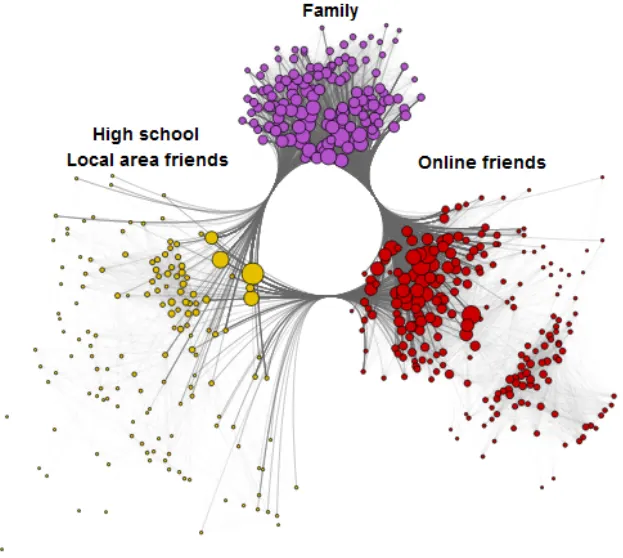
- 그래프를 사용하는 이유
    1. 추상적인 개념을 구조화하여 다루기에 적합함
    2. Non-Euclidean Space도 학습할 수 있음
        - 더 현실에 적합함

**GNN의 구조**

1. 그래프 구조 생성
2. 메시지 패싱: 각 노드가 이웃 노드로부터 정보를 받아 전달
    1. 메시지 생성: 각 노드 -> 이웃 노드 전달할 메시지 생성
    2. 집계: 여러 이웃의 메시지를 하나로 합침
    3. 갱신: 자신의 노드 상태 업데이터
3. 최종 출력

즉, 내 이웃 노드의 정보를 나에게 전달/요약

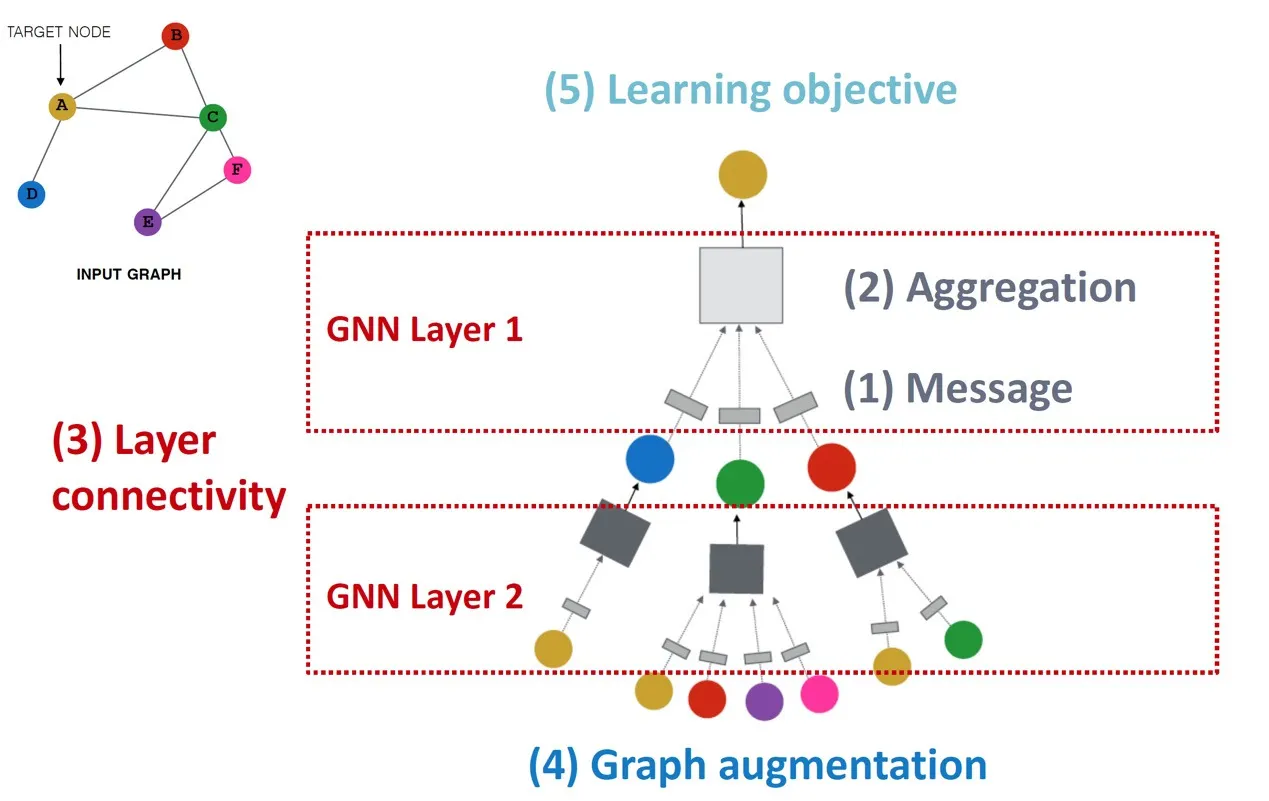

### 2.3 LightGCN

- 추천 시스템에 특화된 GNN. 복잡성을 제거하고 최적화

- 복잡한 연산이 사용자-아이템의 관계를 왜곡, 학습을 방해할 수 있음을 해결하기 위해 탄생

1. 특징 변환 제거: 복잡한 학습 파라미터 제거
2. 비선형 활성화 함수 제거: 정규화된 합 or 평균 사용

-> 그래프 구조와 전파라는 뼈대를 통해 본질적이고 효율적인 모델을 추구

### 2.4 GNN 활용, 장단점

- Pinterest
- 소셜 네트워크
- 추천 시스템
- 화생공
- 금융 및 보안
- Traffic
- 프로그램 분석

- 장점
    - 고차원 협업 시그널 포착
    - 정형화되지 않은 데이터 학습 가능
    - cold start 완화
- 단점
    - 과평탄화
    - 과악춥
    - 계산 복잡함
    - 해석 어려움

## Transformer기반 추천 시스템

- 기존의 모델들은 순차적인 정보를 다루는 데 한계가 있음

- Transformer를 통해 문맥을 파악하여 더 정확한 의도를 찾음
- 멀리 떨어진 과거의 행동으로 부터 촉발된 행동 패턴을 찾음

- 거리에 상관 없이 self-attention을 통해 관계를 계산할 수 있기 때문에 장기 의존성을 해결하고 더 정확하고 복합적인 의도를 파악할 수 있음

1. SASRec
    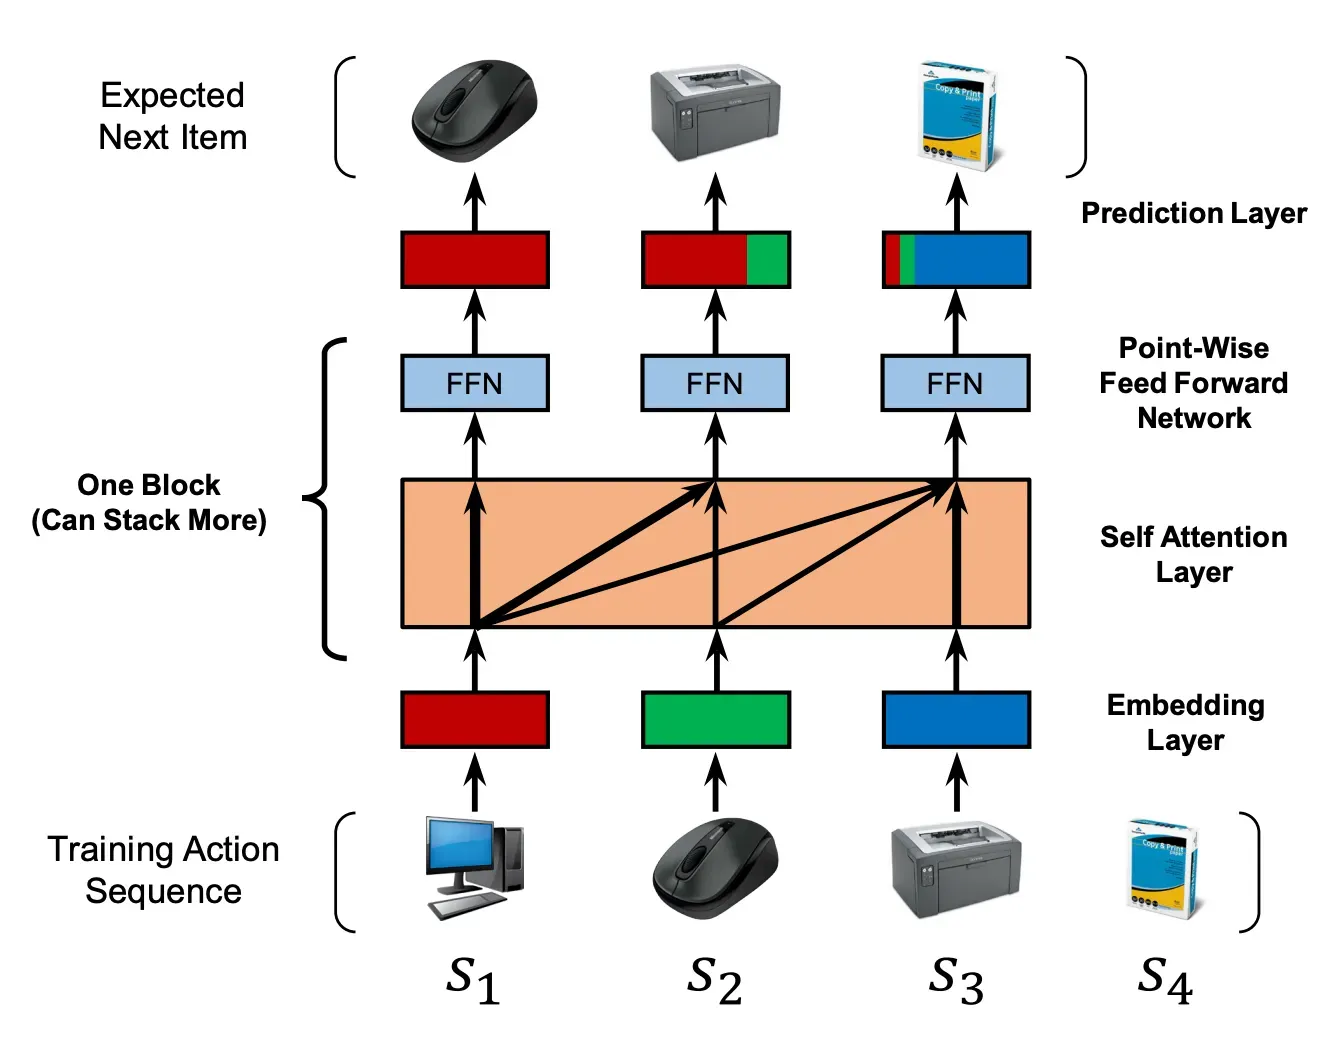
    - 단방향 어탠션
    - 과거의 아이템들을 통해 다음 아이템 예측
    - 계산량이 많고 단방향적임

2. BERT4Rec
    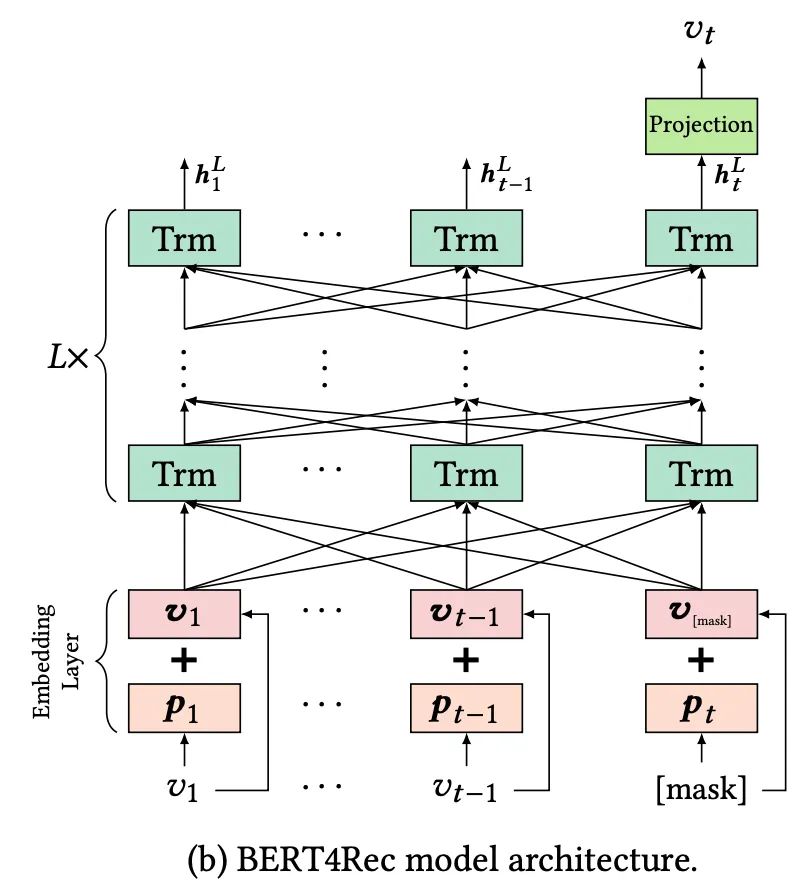
    - 위의 모델을 보완
    - 시퀀스 일부를 mask로 가리고, 가려진 아이템이 과거와 미래의 아이템 모두 참조
    - 가려진 아이템을 예측
    - 양방향의 문맥으로 고려할 수 있고, 시퀀스 전체의 선호도를 파악하는데 초점을 맞춤

## 최신 트렌드: LLM의 시대

- 랭킹, 혹은 점수의 문제가 아닌 언어의 문제로 보고 푼다.

- 의미 기반 추천, 다양한 데이터 형식 (멀티모달) 사용 가능

- 메타 데이터에만 의존하는 것이 아닌, 텍스트 전반적인 맥락을 고려할 수 있기 때문에 평점이 없는 신작도 빠르게 추천할 수 있음
    - 대화형 추천
    - zero shot 추천

**P5/TALLRec**

- P5: 모든 추천 과제를 LLM이 풀 수 있도록 하나의 거대한 프롬프트 문제로 통일시킴
- TALLRec: P5처럼 하면 비싸니깐 파인튜닝 잘 하기

-> 추천시스템이 사용자와 상호작용하는 방식 자체를 바꿈

## 현업의 고민: 책임감 있는 AI

- 성능이 다가 아니다!

1. 인기 편향
    - 소수의 인기 아이템의 과도한 노출
    - 비인기 아이템 -> 추천이 점점 안됨
2. 설명 가능성
    - 블랙박스 문제
    - 설득의 근거로 제시하기에 빈약함.


결국 최고의 모델은 편향과 공정성을 고려하며 추천 근거를 설명할 수 있어야 함

- 현업에서는 선형 기반 추천 시스템과 딥러닝이 병행된다고 함.
- 섞어 쓰는 법
    1. 선형 모델을 통해 사용자가 조금이라도 좋아할만한 후보군 생성
    2. 딥러닝 모델을 통해 정교하게 순위를 매김